# Coulomb Potential Chaos
This project was based on a presentation that Tom Dooling made regarding a system in which three charged particles, one fixed, one "free" to move, and one that would provide a driving force. The particles would be constrained to move one-dimensionally.
The force on a particle at a position $x$, given that the other two particles were at position $+s$ and $-s$ respectively is given as:
$$F = kq^2 \Big(\frac{1}{(s+x)^2} - \frac{1}{(s-x)^2} \Big)$$
If we were to assign the particle at $-s$ the ability to move and provide the driving force by simply changing the distance between the free and driven particles, then the force becomes:
$$F = kq^2 \Big(\frac{1}{(s + A\cos(\omega_d t) + x)^2} - \frac{1}{(s-x)^2} \Big)$$
Where A is the amplitude of the driver, and $\omega_d$ is the angular frequency of the driver. $k$ is Coulomb's constant, and $q$ is the charge of each particle. Here, the charges are of the same magnitude.
Tom adds in a dampening force, and as a result our final form represented as a differential equation is:
$$\ddot{x} = \frac{kq^2}{m} \Big(\frac{1}{(s + A\cos(\omega_d t) + x)^2} - \frac{1}{(s-x)^2} \Big) - \frac{bv}{m}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ode

In [2]:
ϵ0 = 8.8541878128e-12 #permittivity of free space
k = 1 #1/(4*np.pi*ϵ0)
q = 1 #1.602176634e-19 #electron charge
me = 1 #9.1093837015e-31 #electron mass
s = 1 #meter separation distance turns out to make the frequency go down to something "reasonable"

Tom goes through and performs an analysis of the ODE if there were only small-amplitude oscillations, going to the potential well's expression, assuming $A<<s+x$, and then using the Taylor expansion of $\frac{1}{1-x}$ to obtain an expression for the terms associated with a harmonic oscillator.
He finds that the angular frequency of a small-amplitude oscillation is $\omega_0 = \frac{2q}{s}\sqrt{\frac{k}{sm}}$.

In [3]:
K = 4*k*(q**2)/(s**3)
ω0 = np.sqrt(K/me)
print(ω0)

2.0


In [4]:
z0 = k*(q**2)/me
b0 = 0

In [5]:
#z0 = kq^2/me
#K = 4kq^2/s^3
#K = 4z0me/s^3
#w0^2 = K/me = 4z0/s^3
#w0^2 s^3 / 4 = z0

In [6]:
def CoulombPot(d,t): #These are the differential equations for dxdt and dvdt that govern the system.
    x = d[0]
    v = d[1]
    dxdt = v
    dvdt = z0*((1/(x+s+A*np.cos(w*t)))**2 - (1/(s-x))**2) - b*v/me
    return np.array([dxdt, dvdt])

In [7]:
def run_coulombpot(Amp=1, freq= 2*np.pi, zparm=1.0, bcoef=0.1, x0 = 0, v0=0, tend = 10): #this is code to run the system
    global A, w, z, b
    A = Amp
    w = freq
    z = zparm
    b = bcoef
    t = 0.0
    dt = 0.01 #pretty big, but that's what Tom used.
    
    data = np.array([x0, v0])
    tdata = []
    xdata = []
    vdata = []
    Fddata = []
    
    tdata.append(t)
    xdata.append(x0)
    vdata.append(v0)
    Fddata.append(A*np.cos(w*t))
    
    while t < tend:
        data = ode.RK4n(CoulombPot, data, t, dt)
        t = t+dt
        tdata.append(t)
        xdata.append(data[0])
        vdata.append(data[1])
        Fddata.append(A*np.cos(w*t))
        
    return np.array(tdata), np.array(xdata), np.array(vdata), np.array(Fddata)

In [8]:
def plot_xdata(t, xdata): #plots data.

    plt.figure(dpi=150)
    plt.plot(t,xdata, 'b-', label='A = %.3f' % A)
    plt.xlabel('t (s)')
    plt.ylabel('x (dimless)')
    plt.legend(loc='best')
    plt.show()

In [9]:
def get_fixed_points_Amp(A = 0.0): #this is using Tom's *exact* same values he gave in one of his presentation slides.
    
    t_total = 3000 #It takes a *lot* of time to get the system to settle into its period.
    N_last_periods = int((1/6)*t_total)
    k = 1 #1/(4*np.pi*ϵ0)
    q = 1 #1.602176634e-19 #electron charge
    me = 1 #9.1093837015e-31 #electron mass
    s = 1
    K = 4*k*(q**2)/(s**3)
    ω0 = np.sqrt(K/me)
    z0 = k*(q**2)/me
    angfreq = 0.9*ω0
    b0 = 0.1
    x0 = 0
    v0 = 0
    
    tdata, xdata, vdata, Fddata = run_coulombpot(A, angfreq, z0, b0, x0, v0, t_total) #amp freq zparm bcoef x0 v0 tend

    times = np.arange((5/6)*t_total,t_total,(2*np.pi/angfreq))
    xamps = []

    for t in times:
        index = np.abs(tdata-t).argmin()
        xamps.append(xdata[index])

    return xamps

In [10]:
def make_phase_plot(xdata, vdata): #this code is taken from the phase plot code in order to plot phase plots.

    plt.figure(dpi=150)
    plt.plot(xdata,vdata, 'm-', linewidth=0.5, label='A = %.3f' % A)
    plt.xlabel('x (dim)')
    plt.ylabel('v (dim/s)')
    plt.legend(loc='best')
    plt.show()

Below, I will illustrate that my code works by using the exact same values Tom had inserted on one of his slides.

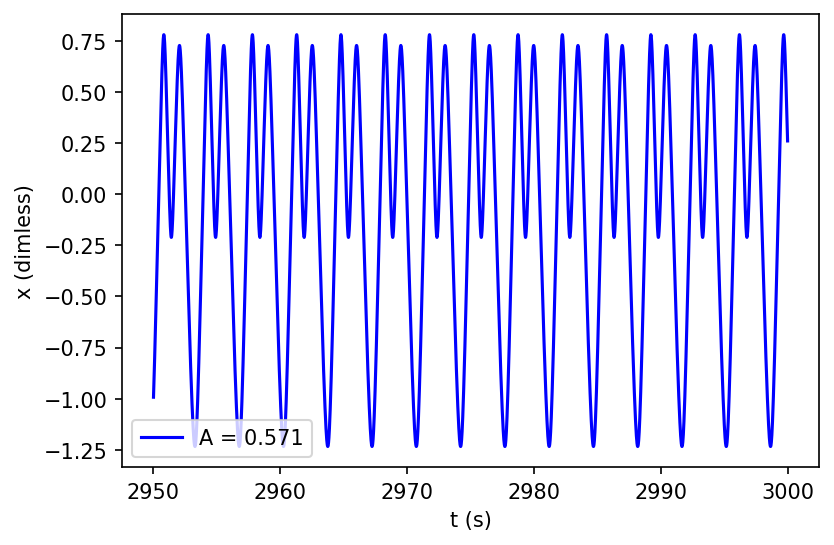

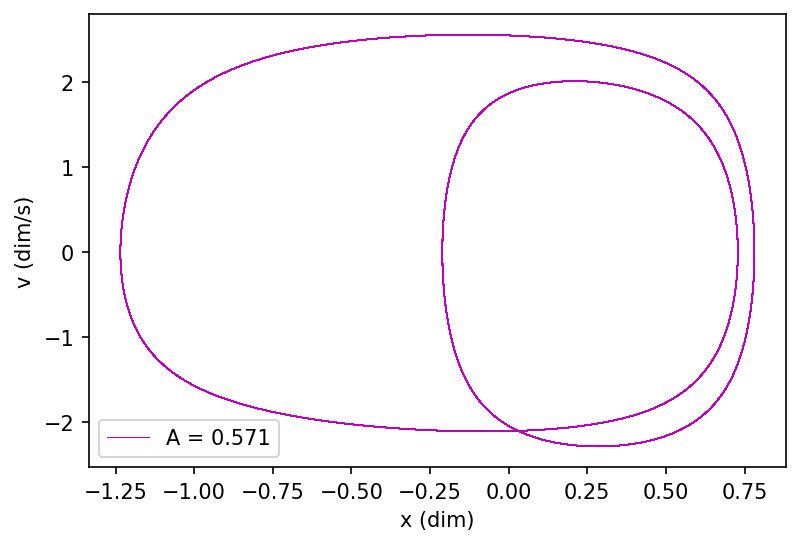

Wall time: 9.3 s


In [11]:
%%time
#This is just running a system configuration with one A value. I cannot put statements after the %%time bit.
#ϵ0 = 8.8541878128e-12 #permittivity of free space
k = 1 #1/(4*np.pi*ϵ0)
q = 1 #1.602176634e-19 #electron charge
me = 1 #9.1093837015e-31 #electron mass
s = 1
K = 4*k*(q**2)/(s**3)
ω0 = np.sqrt(K/me)
z0 = k*(q**2)/me
angfreq = 0.9*ω0
b0 = 0.1
x0 = 0
v0 = 0
time, x, v, f = run_coulombpot(0.571, angfreq, z0, b0, x0, v0, 3000) #amp freq zparm bcoef x0 v0 tend

#plot_xdata(time, x)
Nlast = int(len(x)/6)
ndata = int(0.1*Nlast)
xlast = x[-Nlast:]
vlast = v[-Nlast:]
plot_xdata(time[-ndata:], x[-ndata:])
make_phase_plot(xlast,vlast)

In [12]:
%%time
amps = np.linspace(0.570,0.655,250)
xoutzoom = []
Aoutzoom = []
for a in amps:
    dummy = get_fixed_points_Amp(a)
    xoutzoom = xoutzoom + dummy
    Aoutzoom = Aoutzoom + (a*np.ones(len(dummy))).tolist()

Wall time: 38min 43s


Text(0, 0.5, 'x')

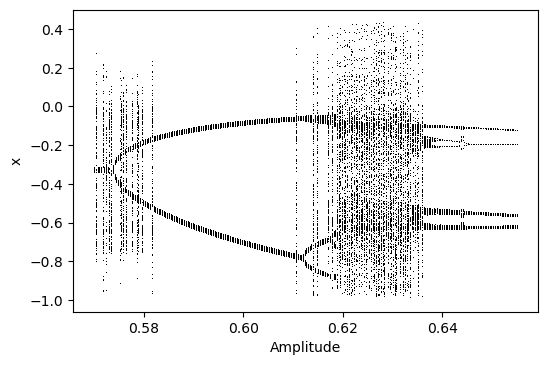

In [13]:
plt.figure(dpi=100)
plt.plot(Aoutzoom, xoutzoom, 'k,')
plt.xlabel('Amplitude')
plt.ylabel('x')
#Looks reflected about amplitude axis in comparison to Tom's ppt.

In [183]:
%%time
amps = np.linspace(0.0,0.95,100)
#This code took an incredible amount of time because it was so computationally hungry.
#I wanted to time exactly how long it took to run the code so I can estimate how long it would take to run
#similar code.
xout = []
Aout = []
for a in amps:
    dummy = get_fixed_points_Amp(a)
    xout = xout + dummy
    Aout = Aout + (a*np.ones(len(dummy))).tolist()

Wall time: 2h 7min 36s


Text(0, 0.5, 'x')

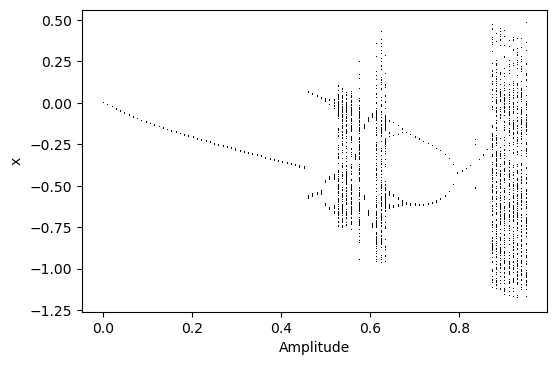

In [186]:
plt.figure(dpi=100)
plt.plot(Aout, xout, 'k,')
plt.xlabel('Amplitude')
plt.ylabel('x')
#the bifurcation diagram looks incredibly different from the one in the presentation
#I chose a different range of values to cover:
#Tom goes from 0.57 to 0.655, I go from 0 to 0.95.
#It took 2 hr, 7.5 min to compute values for this plot: 3000s for each iteration as it takes a significant time
#for the system to settle into its periodic cycle.
#If I had used numba maybe this would have been less painful, but alas, I did not do so.